In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from matplotlib.figure import Figure
from matplotlib import style
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="white", color_codes=True)
#import plotly.offline
import cufflinks as cf # requires pip install cufflinks
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [2]:
df = pd.read_csv("Stroke.csv")
df.head(5)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


Text(0.5, -1.2, 'Heatmap of features')

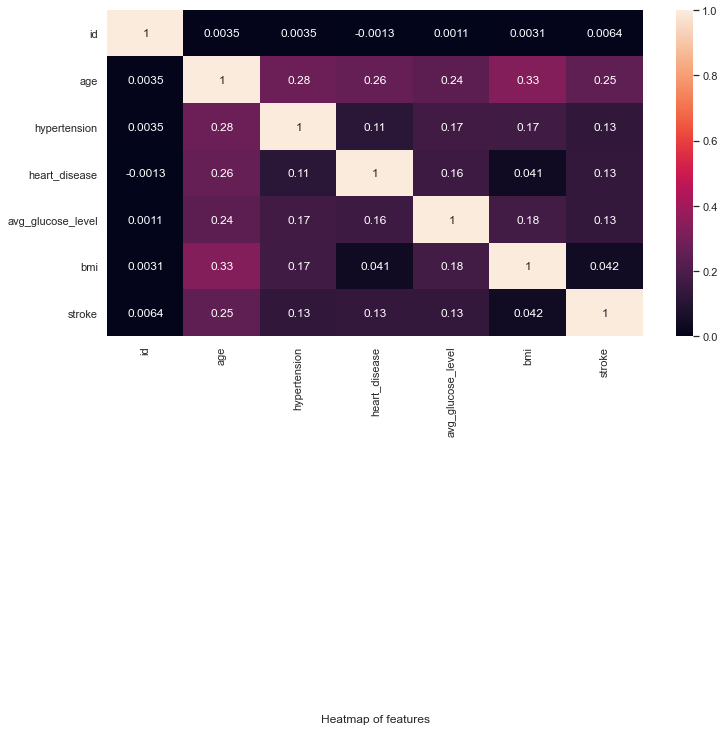

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot = True)
plt.title("Heatmap of features", y=-1.2)
 

In [8]:
eda = df.iloc[:, 0:12]
eda.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<AxesSubplot:>

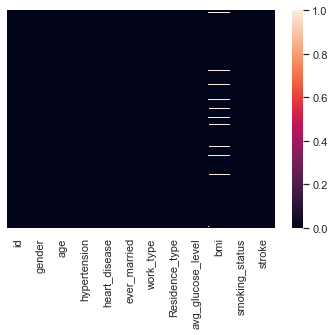

In [10]:
sns.heatmap(eda.isnull(), yticklabels = False)

<AxesSubplot:>

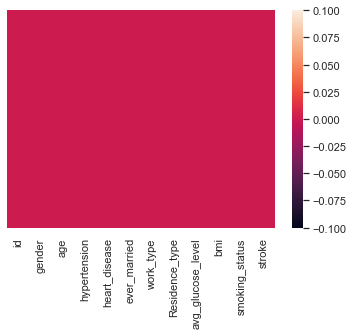

In [11]:
eda.dropna(inplace=True)
sns.heatmap(eda.isnull(), yticklabels = False)
 

0    4700
1     209
Name: stroke, dtype: int64

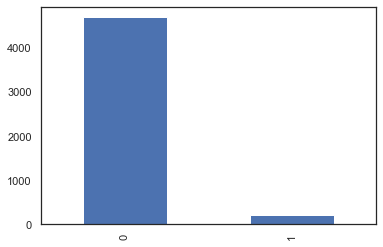

In [12]:
eda["stroke"].value_counts().plot(kind="bar")
eda["stroke"].value_counts()

In [13]:
eda["stroke"].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [14]:
eda.stroke.nunique()

2

In [15]:
eda.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

0    4700
1     209
Name: stroke, dtype: int64


<AxesSubplot:ylabel='Type'>

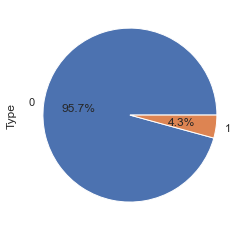

In [16]:
print(eda["stroke"].value_counts())

eda.groupby('stroke').size().plot(kind='pie',
                                       y = "stroke",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [17]:
for col in eda.select_dtypes(include=['object']):
    eda[col] = eda[col].astype('category')

In [18]:
for col in eda.select_dtypes(include=['category']):
    eda[col] = eda[col].cat.codes

In [19]:
eda["stroke"].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

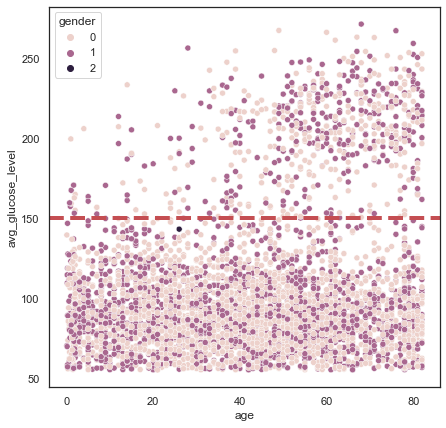

In [20]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=eda, x="age", y="avg_glucose_level", hue='gender')
graph.axhline(y= 150, linewidth=4, color='r', linestyle= '--')
plt.show()

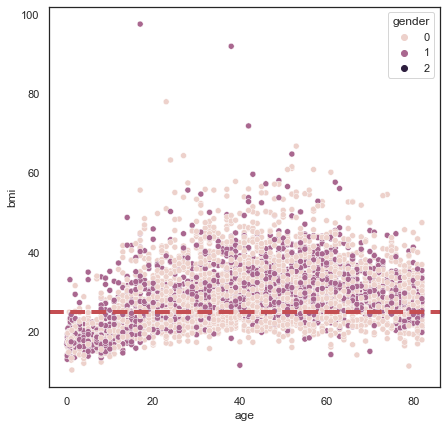

In [21]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=eda, x="age", y="bmi", hue='gender')
graph.axhline(y= 25, linewidth=4, color='r', linestyle= '--')
plt.show()

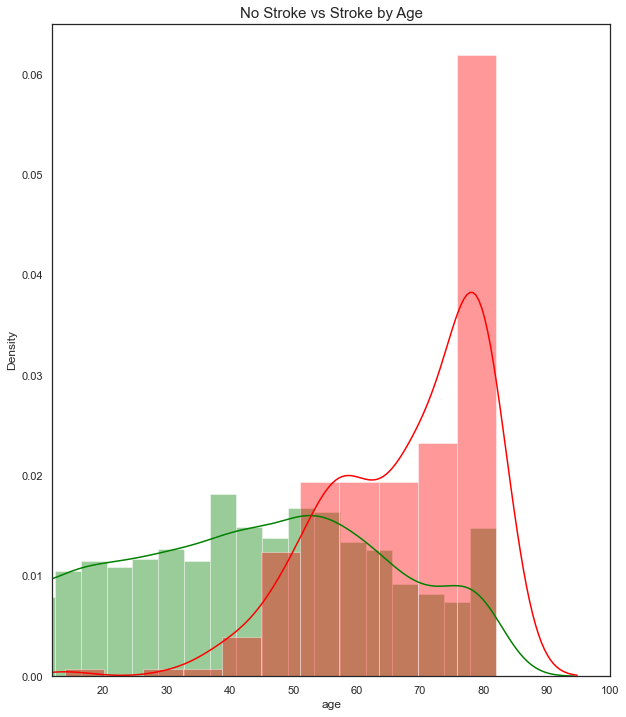

In [22]:
plt.figure(figsize=(10,12))

sns.distplot(eda[eda['stroke'] == 0]["age"], color='green') # No Stroke - green
sns.distplot(eda[eda['stroke'] == 1]["age"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([12,100])
plt.show()

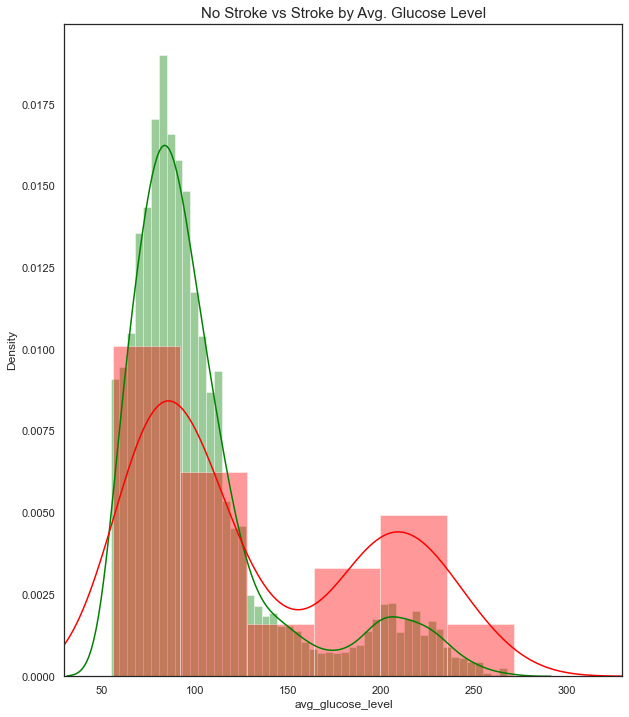

In [23]:
plt.figure(figsize=(10,12))

sns.distplot(eda[eda['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(eda[eda['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=15)
plt.xlim([30,330])
plt.show()

1    2490
0    2419
Name: Residence_type, dtype: int64


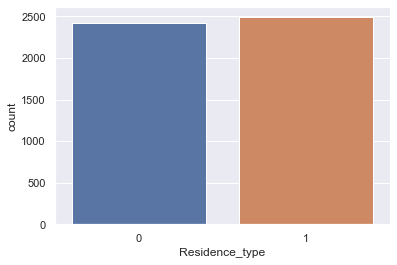

In [24]:
print(eda.Residence_type.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=eda, x="Residence_type")
plt.show()

2    1852
0    1483
1     837
3     737
Name: smoking_status, dtype: int64


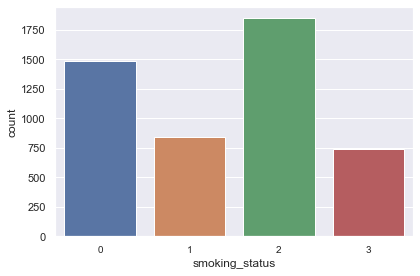

In [25]:
print(eda.smoking_status.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=eda, x="smoking_status")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

In [26]:
#Extracting Independent and dependent Variable  
X= eda.iloc[:, 0:11].values  
y= eda.iloc[:, 11].values  

In [27]:
X.shape

(4909, 11)

In [28]:
y.shape

(4909,)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [30]:
from imblearn.over_sampling import SMOTE


In [31]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_X= StandardScaler()    
X= st_X.fit_transform(X)    
     

In [32]:
print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

sm = SMOTE(random_state=2)
X_res, y_res = sm.fit_resample(X, y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))

Before OverSampling, counts of label '1': 209
Before OverSampling, counts of label '0': 4700 

After OverSampling, the shape of train_X: (9400, 11)
After OverSampling, the shape of train_y: (9400,) 

After OverSampling, counts of label '1': 4700
After OverSampling, counts of label '0': 4700


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)

print(" X_train dataset: ", X_train.shape)
print(" y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print(" y_test dataset: ", y_test.shape)

 X_train dataset:  (6580, 11)
 y_train dataset:  (6580,)
X_test dataset:  (2820, 11)
 y_test dataset:  (2820,)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [36]:
from sklearn.svm import SVC # "Support vector classifier"  
svc = SVC()

In [37]:
from sklearn.svm import SVC # "Support vector classifier"  
svc = SVC(kernel='linear', random_state=0).fit(X_train, y_train)  

In [38]:
#Predicting the test set result

y_pred_svc= svc.predict(X_test)  
y_pred_svc

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [39]:
cm_svc= confusion_matrix(y_test, y_pred_svc)  
cm_svc

array([[1050,  362],
       [ 260, 1148]], dtype=int64)

In [40]:
model_acuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Model accuracy is :",model_acuracy_svc)

Model accuracy is : 0.7794326241134751


In [41]:
svc_report= classification_report(y_test, y_pred_svc)
print("SVC model report")
print("__________________")
print(svc_report)

SVC model report
__________________
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1412
           1       0.76      0.82      0.79      1408

    accuracy                           0.78      2820
   macro avg       0.78      0.78      0.78      2820
weighted avg       0.78      0.78      0.78      2820



In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

KNN ALGORITHM
--

In [43]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors=3, metric='manhattan', p=2 )   
knn.fit(X_train, y_train)  

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [44]:
 #Predicting the test set result  
y_pred_knn= knn.predict(X_test) 
y_pred_knn

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [45]:
y_prob_knn = knn.predict_proba(X_test)[:,1]
y_prob_knn

array([1., 1., 1., ..., 1., 0., 1.])

In [46]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm_knn= confusion_matrix(y_test, y_pred_knn) 
cm_knn

array([[1231,  181],
       [   9, 1399]], dtype=int64)

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [48]:
model_acuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Model accuracy is :",model_acuracy_knn)

Model accuracy is : 0.9326241134751773


In [49]:
KNN_report= classification_report(y_test, y_pred_knn)
print("KNN model report")
print("__________________")
print(KNN_report)

KNN model report
__________________
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1412
           1       0.89      0.99      0.94      1408

    accuracy                           0.93      2820
   macro avg       0.94      0.93      0.93      2820
weighted avg       0.94      0.93      0.93      2820



              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1412
           1       0.89      0.99      0.94      1408

    accuracy                           0.93      2820
   macro avg       0.94      0.93      0.93      2820
weighted avg       0.94      0.93      0.93      2820

ROC AUC score: 0.9676957249549317
Accuracy Score:  0.9326241134751773


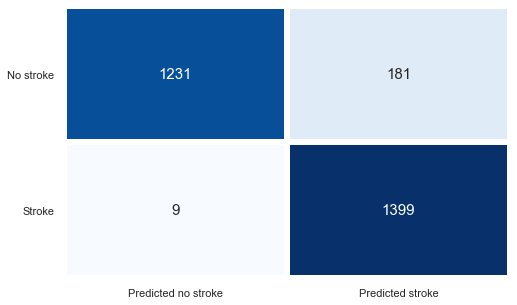

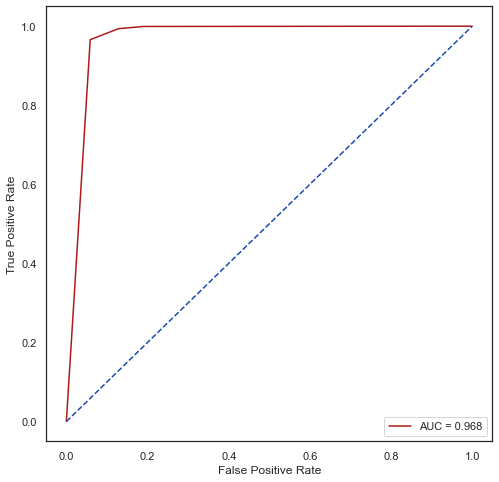

In [50]:
print(classification_report(y_test, y_pred_knn))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob_knn)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred_knn))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm_knn, cmap = 'Blues',
            annot = True,
            fmt = 'd',
            linewidths = 5,
            cbar = False,
            annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'],
            xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_knn)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,
         true_positive_rate,
         color = '#b01717',
         label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Logistics Regression
--

In [51]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
log= LogisticRegression(random_state=0)  
log.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [52]:
#Predicting the test set result  
y_pred_log= log.predict(X_test)  
y_pred_log

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
y_prob_log = log.predict_proba(X_test)[:,1]
y_prob_log

array([0.83443824, 0.82503497, 0.49585358, ..., 0.18760624, 0.0349131 ,
       0.33951931])

In [54]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm_log= confusion_matrix(y_test, y_pred_log)  
cm_log

array([[1060,  352],
       [ 269, 1139]], dtype=int64)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [56]:
model_acuracy_log = accuracy_score(y_test, y_pred_log)
print("Model accuracy is :",model_acuracy_log)

Model accuracy is : 0.7797872340425532


In [57]:
Logistics_report = classification_report(y_test, y_pred_log)
print("Logistics Regression model report")
print("__________________")
print(Logistics_report)

Logistics Regression model report
__________________
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1412
           1       0.76      0.81      0.79      1408

    accuracy                           0.78      2820
   macro avg       0.78      0.78      0.78      2820
weighted avg       0.78      0.78      0.78      2820



              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1412
           1       0.76      0.81      0.79      1408

    accuracy                           0.78      2820
   macro avg       0.78      0.78      0.78      2820
weighted avg       0.78      0.78      0.78      2820

ROC AUC score: 0.8546840796420293
Accuracy Score:  0.7797872340425532


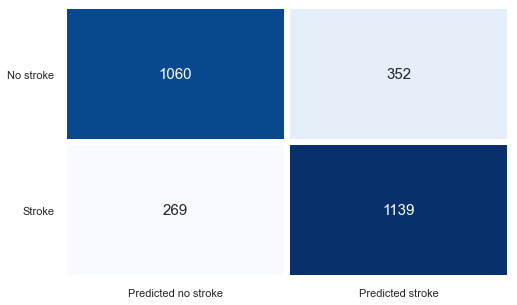

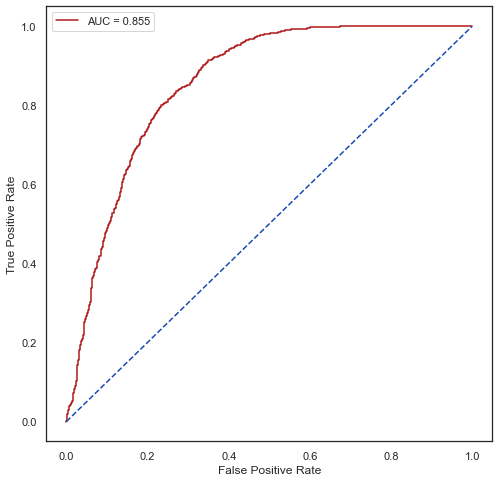

In [58]:
print(classification_report(y_test, y_pred_log))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob_log)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred_log))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm_log, cmap = 'Blues',
            annot = True,
            fmt = 'd', 
            linewidths = 5,
            cbar = False,
            annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'],
            xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_log)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Naiyes Bayes classification
--

In [59]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
from sklearn.naive_bayes import BernoulliNB
naiyes = GaussianNB()  
naiyes.fit(X_train, y_train)  

GaussianNB()

In [60]:
# Predicting the Test set results  
y_pred_naiyes = naiyes.predict(X_test)  
y_pred_naiyes

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [61]:
y_prob_naiyes = log.predict_proba(X_test)[:,1]
y_prob_naiyes

array([0.83443824, 0.82503497, 0.49585358, ..., 0.18760624, 0.0349131 ,
       0.33951931])

In [62]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
cm_naiyes = confusion_matrix(y_test, y_pred_naiyes)  
cm_naiyes

array([[1047,  365],
       [ 279, 1129]], dtype=int64)

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [64]:
model_acuracy_naiyes = accuracy_score(y_test, y_pred_naiyes)
print("Model accuracy is :",model_acuracy_naiyes)

Model accuracy is : 0.7716312056737589


In [65]:
Naiyes_report= classification_report(y_test, y_pred_naiyes)
print("Naiyes Bayes model report")
print("__________________")
print(Naiyes_report)

Naiyes Bayes model report
__________________
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1412
           1       0.76      0.80      0.78      1408

    accuracy                           0.77      2820
   macro avg       0.77      0.77      0.77      2820
weighted avg       0.77      0.77      0.77      2820



              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1412
           1       0.76      0.80      0.78      1408

    accuracy                           0.77      2820
   macro avg       0.77      0.77      0.77      2820
weighted avg       0.77      0.77      0.77      2820

ROC AUC score: 0.8546840796420293
Accuracy Score:  0.7716312056737589


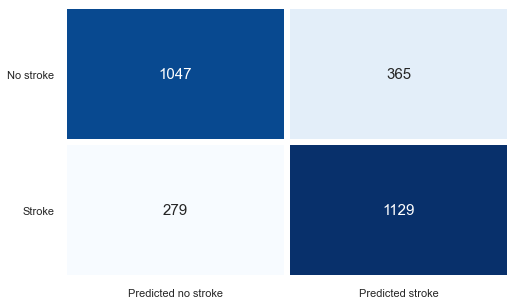

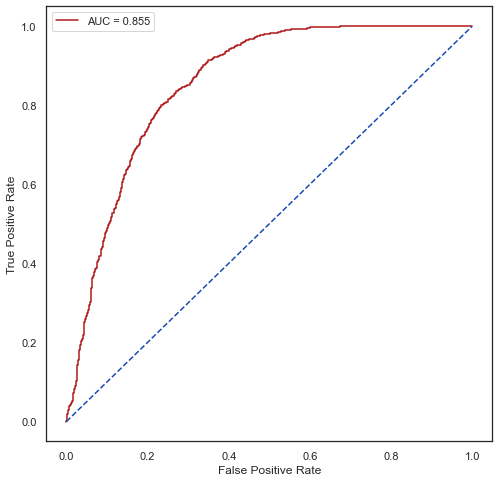

In [66]:
print(classification_report(y_test, y_pred_naiyes))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob_naiyes)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred_naiyes))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm_naiyes, cmap = 'Blues',
            annot = True,
            fmt = 'd',
            linewidths = 5,
            cbar = False, 
            annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], 
            xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_naiyes)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Random Forest Classification
--

In [67]:
#Fitting  RandomForestClassifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
random= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
random.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [68]:
#Predicting the test set result  
y_pred_random= random.predict(X_test) 
y_prob_random = random.predict_proba(X_test)[:,1]
y_pred_random
y_prob_random

array([1. , 0.9, 1. , ..., 1. , 0. , 0.9])

In [69]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm_random= confusion_matrix(y_test, y_pred_random)  
cm_random

array([[1334,   78],
       [  49, 1359]], dtype=int64)

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [71]:
model_acuracy_random = accuracy_score(y_test, y_pred_random)
print("Model accuracy is :",model_acuracy_random)

Model accuracy is : 0.9549645390070922


In [72]:
Random_report= classification_report(y_test, y_pred_random)
print("Random Forest model report")
print("__________________")
print(Random_report)

Random Forest model report
__________________
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1412
           1       0.95      0.97      0.96      1408

    accuracy                           0.95      2820
   macro avg       0.96      0.95      0.95      2820
weighted avg       0.96      0.95      0.95      2820



              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1412
           1       0.95      0.97      0.96      1408

    accuracy                           0.95      2820
   macro avg       0.96      0.95      0.95      2820
weighted avg       0.96      0.95      0.95      2820

ROC AUC score: 0.9905278718935101
Accuracy Score:  0.9549645390070922


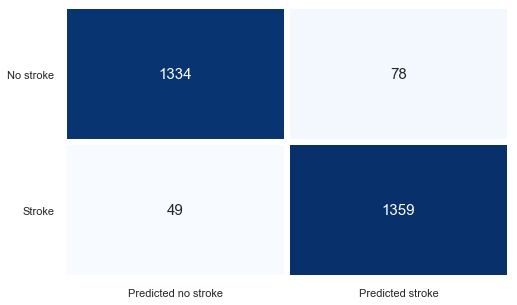

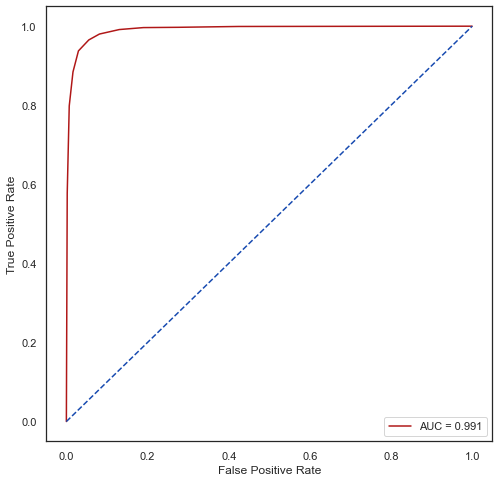

In [73]:
print(classification_report(y_test, y_pred_random))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob_random)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred_random))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm_random, cmap = 'Blues',
            annot = True,
            fmt = 'd',
            linewidths = 5,
            cbar = False,
            annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], 
            xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_random)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

DecisionTreeClassifier
--

In [74]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  
dct= DecisionTreeClassifier(criterion='entropy', random_state=0)  
dct.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [75]:
#Predicting the test set result  
y_pred_dct= dct.predict(X_test)
y_pred_dct

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [76]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm_dct= confusion_matrix(y_test, y_pred_dct)  
cm_dct

array([[1298,  114],
       [  98, 1310]], dtype=int64)

In [77]:
y_prob_dct = dct.predict_proba(X_test)[:,1]
y_prob_dct

array([1., 1., 1., ..., 1., 0., 1.])

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [79]:
model_acuracy_dct = accuracy_score(y_test, y_pred_dct)
print("Model accuracy is :",model_acuracy_dct)

Model accuracy is : 0.924822695035461


In [80]:
DecisionTree_report= classification_report(y_test, y_pred_dct)
print("Decision Tree model report")
print("__________________")
print(DecisionTree_report)

Decision Tree model report
__________________
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1412
           1       0.92      0.93      0.93      1408

    accuracy                           0.92      2820
   macro avg       0.92      0.92      0.92      2820
weighted avg       0.92      0.92      0.92      2820



              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1412
           1       0.92      0.93      0.93      1408

    accuracy                           0.92      2820
   macro avg       0.92      0.92      0.92      2820
weighted avg       0.92      0.92      0.92      2820

ROC AUC score: 0.9248305916816894
Accuracy Score:  0.924822695035461


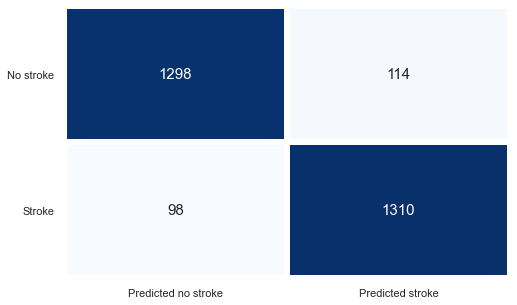

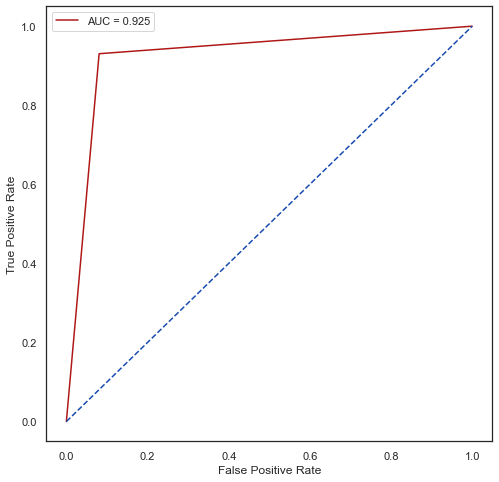

In [81]:
print(classification_report(y_test, y_pred_dct))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob_dct)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred_dct))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm_dct, cmap = 'Blues',
            annot = True,
            fmt = 'd',
            linewidths = 5,
            cbar = False,
            annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'],
            xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_dct)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Neural Network Algorithm
--

In [82]:
# Import necessary modules
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [83]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8),
                    activation='relu',
                    solver='adam',
                    max_iter=500)
mlp.fit(X_train,y_train)
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [84]:
cm_mlp = confusion_matrix(y_train,predict_train)
print(classification_report(y_train,predict_train))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      3288
           1       0.85      0.93      0.89      3292

    accuracy                           0.89      6580
   macro avg       0.89      0.89      0.89      6580
weighted avg       0.89      0.89      0.89      6580



In [85]:
y_prob_mlp = mlp.predict_proba(X_test)[:,1]
y_prob_mlp

array([9.05698870e-01, 9.29472499e-01, 4.53807439e-01, ...,
       7.94078515e-01, 3.99840316e-06, 2.52702074e-01])

In [86]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[1135  277]
 [ 126 1282]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1412
           1       0.82      0.91      0.86      1408

    accuracy                           0.86      2820
   macro avg       0.86      0.86      0.86      2820
weighted avg       0.86      0.86      0.86      2820



In [87]:
model_acuracy_mlp = accuracy_score(y_test, predict_test)
print("Model accuracy is :",model_acuracy_mlp)

Model accuracy is : 0.8570921985815603


              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1412
           1       0.82      0.91      0.86      1408

    accuracy                           0.86      2820
   macro avg       0.86      0.86      0.86      2820
weighted avg       0.86      0.86      0.86      2820

ROC AUC score: 0.9196965337689931
Accuracy Score:  0.8570921985815603


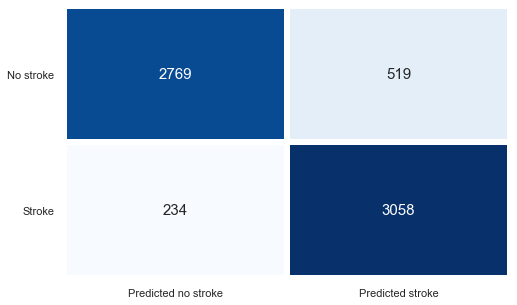

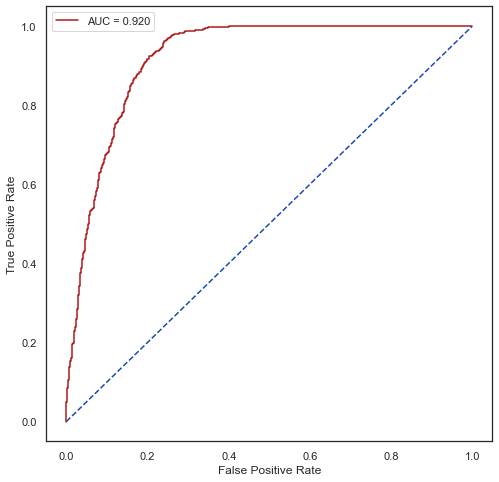

In [88]:
print(classification_report(y_test, predict_test))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob_mlp)}')
print('Accuracy Score: ',accuracy_score(y_test, predict_test))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm_mlp, cmap = 'Blues', 
            annot = True,
            fmt = 'd', 
            linewidths = 5,
            cbar = False, 
            annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'],
            xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_mlp)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [89]:
#Models Comparison

In [90]:
models = []
models.append(['SVM', svc])
models.append(['KNeighbors', knn])
models.append(['Logistic Regreesion',log])
models.append(['GaussianNB', naiyes])
models.append(['Random Forest', random])
models.append(['Decision Tree', dct])
models.append(['Neural Network', mlp])
               
lst_1= []
               
for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)               


SVM :
[[1050  362]
 [ 260 1148]]
Accuracy Score:  0.7794326241134751

K-Fold Validation Mean Accuracy: 78.21 %

Standard Deviation: 1.36 %

ROC AUC Score: 0.78

Precision: 0.76

Recall: 0.82

F1: 0.79
-----------------------------------

KNeighbors :
[[1231  181]
 [   9 1399]]
Accuracy Score:  0.9326241134751773

K-Fold Validation Mean Accuracy: 93.48 %

Standard Deviation: 1.02 %

ROC AUC Score: 0.93

Precision: 0.89

Recall: 0.99

F1: 0.94
-----------------------------------

Logistic Regreesion :
[[1060  352]
 [ 269 1139]]
Accuracy Score:  0.7797872340425532

K-Fold Validation Mean Accuracy: 78.37 %

Standard Deviation: 1.39 %

ROC AUC Score: 0.78

Precision: 0.76

Recall: 0.81

F1: 0.79
-----------------------------------

GaussianNB :
[[1047  365]
 [ 279 1129]]
Accuracy Score:  0.7716312056737589

K-Fold Validation Mean Accuracy: 77.63 %

Standard Deviation: 1.78 %

ROC AUC Score: 0.77

Precision: 0.76

Recall: 0.80

F1: 0.78
-----------------------------------

Random Forest :
[[

In [91]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])


In [92]:
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
4,Random Forest,96.205674,95.471125,0.943719,0.962060,0.959717,0.964489,0.962097
1,KNeighbors,93.262411,93.480243,1.022764,0.932710,0.885443,0.993608,0.936412
5,Decision Tree,92.482270,92.568389,1.207131,0.924831,0.919944,0.930398,0.925141
6,Neural Network,86.737589,86.109422,1.680277,0.867484,0.818350,0.943892,0.876649
2,Logistic Regreesion,77.978723,78.373860,1.391304,0.779829,0.763917,0.808949,0.785788
0,SVM,77.943262,78.206687,1.356250,0.779483,0.760265,0.815341,0.786840
3,GaussianNB,77.163121,77.629179,1.777271,0.771674,0.755689,0.801847,0.778084


Confusion Matrix:
 [[1117  295]
 [  79 1329]]
Accuracy:  0.8673758865248227


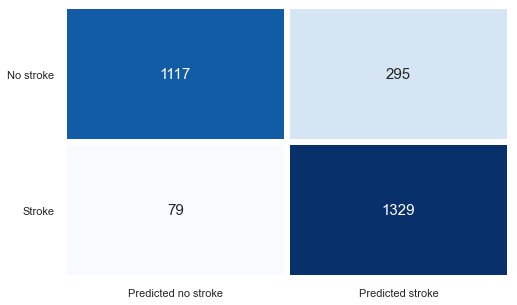

In [93]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n',cm)

# Calculate the Accuracy
accuracy = accuracy_score(y_pred,y_test)
print('Accuracy: ',accuracy)

#Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

In [ ]:
models = []
models.append(['SVM', svc_model])
models.append(['LogisticRegreesion',logreg_model])
models.append(['RandomForestClassifier', rfc_model])
models.append(['DecisionTreeClassifier', dtc_model])
models.append(['Neural Network', mlp])
               
lst_1= []
               
for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)        